## Twitter Sentimental Analysis

## Packages Import

In [1]:
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import joblib as jb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from math import sqrt

import warnings
warnings.filterwarnings("ignore")

## Read the train data

Loading the data into the pandas data frame is certainly one of the most important steps in EDA, as we can see that the value from the data set is comma-separated. So all we have to do is to just read the CSV into a data frame and pandas data frame does the job for us.

In [2]:
# using pandas dataframe to read the data
df=pd.read_csv('Data/Train/Raw/train.csv')

In [3]:
df

,id,company,feelings,tweet
0,2008,CallOfDuty,Irrelevant,It was ab fab seeing the 6 bungalows built in ...
1,1106,AssassinsCreed,Positive,The newest assassins creed looks so FREAKING S...
2,2191,CallOfDuty,Neutral,Whos ready for some zombie royale warzone stre...
3,7835,MaddenNFL,Positive,bro this is FIRE
4,10091,PlayerUnknownsBattlegrounds(PUBG),Irrelevant,HOW TO IMPRESS INDIAN GIRL\nsahilyaduvanshi.in...
...,...,...,...,...
695,7516,LeagueOfLegends,Neutral,♥️ Suikoden 2\n1️⃣ Alex Kidd in Miracle World\...
696,1221,Battlefield,Negative,@EAHelp I haven't been able to log on to Battl...
697,6687,Fortnite,Positive,Un-popular opinion Fortnite is kind of the bes...
698,4922,GrandTheftAuto(GTA),Irrelevant,(NA/PC) Come Vibe With Me. Messing Around In G...


## Data Pre-Processing

Preprocessing in Data Mining: Data preprocessing is a data mining technique which is used to transform the raw data in a useful and efficient format.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        700 non-null    int64 
 1   company   700 non-null    object
 2   feelings  700 non-null    object
 3   tweet     700 non-null    object
dtypes: int64(1), object(3)
memory usage: 22.0+ KB


In [5]:
df.describe(include="all")

,id,company,feelings,tweet
count,700.00000,700,700,700
unique,NaN,32,4,699
top,NaN,LeagueOfLegends,Neutral,Wow
freq,NaN,29,200,2
mean,6311.22000,NaN,NaN,NaN
std,3698.93653,NaN,NaN,NaN
min,6.00000,NaN,NaN,NaN
25%,3079.25000,NaN,NaN,NaN
50%,6407.50000,NaN,NaN,NaN
75%,9478.25000,NaN,NaN,NaN


In [6]:
df.shape

(700, 4)

In [7]:
df.nunique()

id          700
company      32
feelings      4
tweet       699
dtype: int64

## Ckecking for nul values

In [8]:
df.isnull().sum()

id          0
company     0
feelings    0
tweet       0
dtype: int64

## Checking for duplicate rows

In [9]:
## that we have more duplicates we have no option so we drop the datas
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 4)


In [10]:
# Count the number of times it is related to a company or game
df['company'].value_counts()

company
LeagueOfLegends                      29
PlayerUnknownsBattlegrounds(PUBG)    29
FIFA                                 29
ApexLegends                          28
Fortnite                             28
RedDeadRedemption(RDR)               28
CallOfDuty                           25
AssassinsCreed                       25
Amazon                               25
johnson&johnson                      24
Nvidia                               24
Hearthstone                          24
TomClancysRainbowSix                 23
GrandTheftAuto(GTA)                  22
CS-GO                                22
Borderlands                          21
Cyberpunk2077                        21
MaddenNFL                            21
CallOfDutyBlackopsColdWar            20
Overwatch                            20
PlayStation5(PS5)                    20
Google                               20
Microsoft                            20
Verizon                              19
WorldOfCraft                    

In [11]:
# Sentiment count by company or game
td=df.groupby(by=["company","feelings"]).count().reset_index()
td.head(10)

,company,feelings,id,tweet
0,Amazon,Irrelevant,2,2
1,Amazon,Negative,5,5
2,Amazon,Neutral,13,13
3,Amazon,Positive,5,5
4,ApexLegends,Irrelevant,3,3
5,ApexLegends,Negative,4,4
6,ApexLegends,Neutral,14,14
7,ApexLegends,Positive,7,7
8,AssassinsCreed,Irrelevant,1,1
9,AssassinsCreed,Negative,3,3


## Word chart of each Sentiment

					feelings Positive


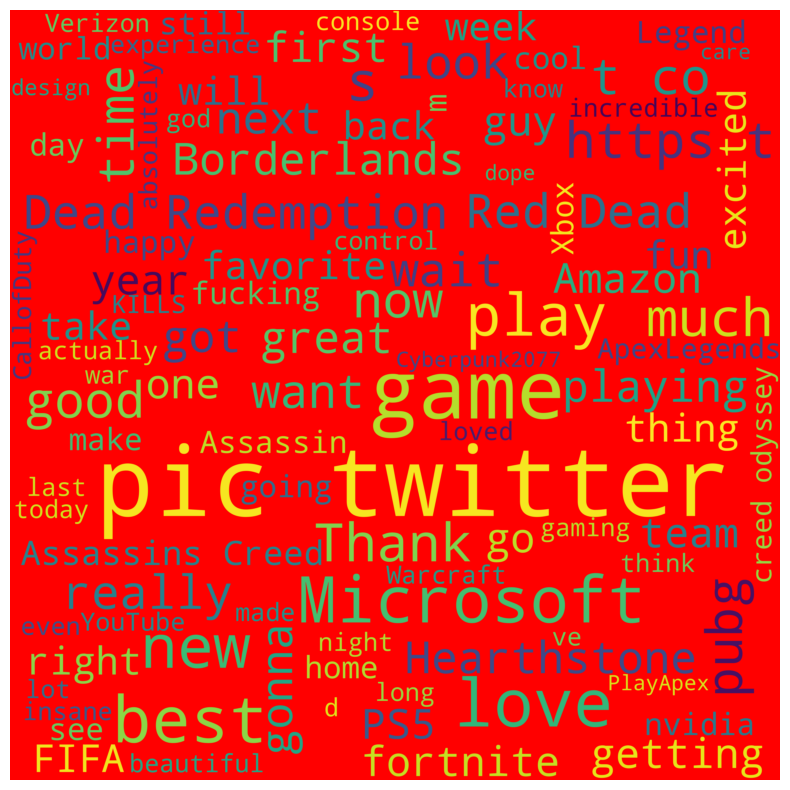

In [12]:
print("\t\t\t\t\tfeelings Positive")

word_cloud_text = ''.join(df[df["feelings"]=="Positive"].tweet)
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="red",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

					feelings Negative


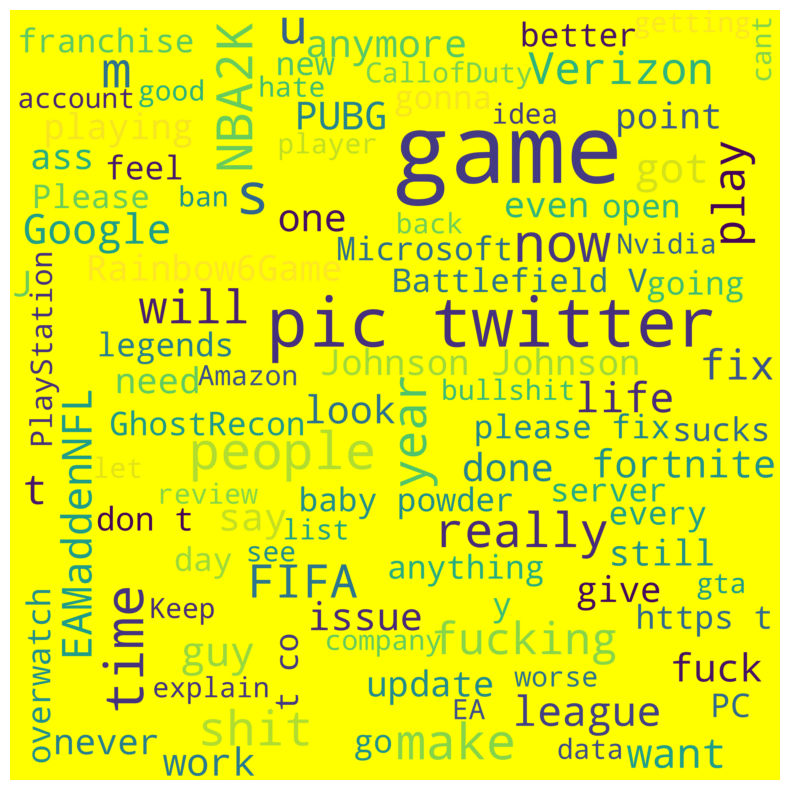

In [13]:
print("\t\t\t\t\tfeelings Negative")

word_cloud_text = ''.join(df[df["feelings"]=="Negative"].tweet)
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="yellow",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

					feelings Neutral


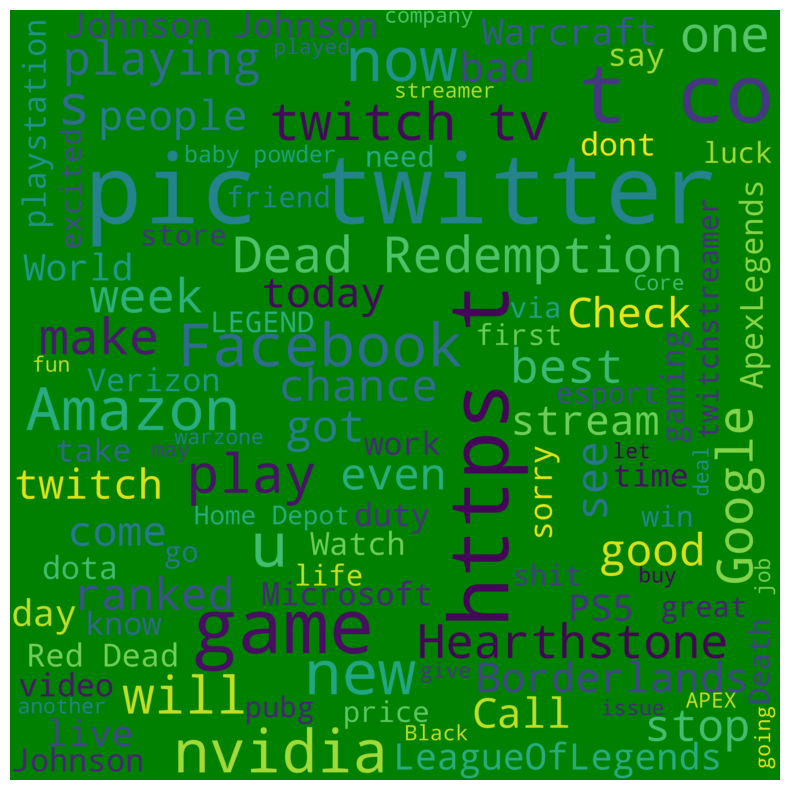

In [14]:
print("\t\t\t\t\tfeelings Neutral")

word_cloud_text = ''.join(df[df["feelings"]=="Neutral"].tweet)
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="green",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

					feelings Irrelevant


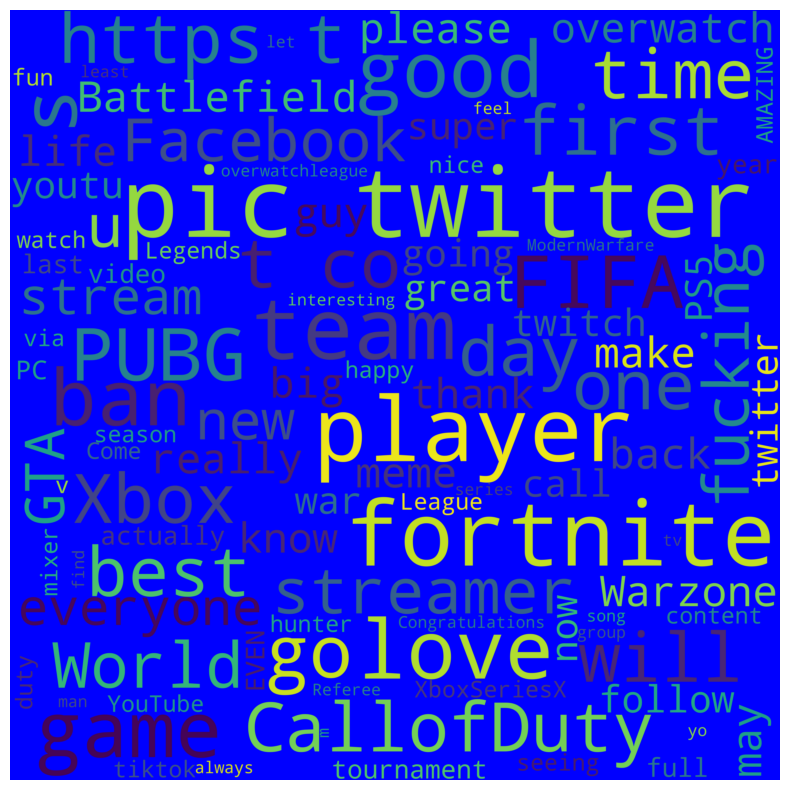

In [15]:
print("\t\t\t\t\tfeelings Irrelevant")

word_cloud_text = ''.join(df[df["feelings"]=="Irrelevant"].tweet)
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="blue",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Feature Engineering

In [16]:
# Target and labels

x=df.drop('feelings',axis=1).copy()
y=df['feelings'].copy()

## Train Test Split

In [17]:
x_train,x_test,y_train,y_test= train_test_split(x,y, train_size=0.7,random_state=123)

In [18]:
x_train.shape

(489, 3)

In [19]:
x_test.shape

(211, 3)

In [20]:
x

,id,company,tweet
0,2008,CallOfDuty,It was ab fab seeing the 6 bungalows built in ...
1,1106,AssassinsCreed,The newest assassins creed looks so FREAKING S...
2,2191,CallOfDuty,Whos ready for some zombie royale warzone stre...
3,7835,MaddenNFL,bro this is FIRE
4,10091,PlayerUnknownsBattlegrounds(PUBG),HOW TO IMPRESS INDIAN GIRL\nsahilyaduvanshi.in...
...,...,...,...
695,7516,LeagueOfLegends,♥️ Suikoden 2\n1️⃣ Alex Kidd in Miracle World\...
696,1221,Battlefield,@EAHelp I haven't been able to log on to Battl...
697,6687,Fortnite,Un-popular opinion Fortnite is kind of the bes...
698,4922,GrandTheftAuto(GTA),(NA/PC) Come Vibe With Me. Messing Around In G...


In [21]:
y

0      Irrelevant
1        Positive
2         Neutral
3        Positive
4      Irrelevant
          ...    
695       Neutral
696      Negative
697      Positive
698    Irrelevant
699       Neutral
Name: feelings, Length: 700, dtype: object

In [22]:
# Save train and test data
x_train.to_csv('Data/Train/Evaluate/x_train.csv',index=False)
y_train.to_csv('Data/Train/Evaluate/y_train.csv',index=False)

x_test.to_csv('Data/Test/Evaluate/x_test.csv',index=False)
y_test.to_csv('Data/Test/Evaluate/y_test.csv',index=False)

In [23]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
# x_encoder
encoder=OrdinalEncoder()
x_encode=encoder.fit(x_train)
jb.dump(x_encode,'Data/Train/Model/x_train_encode_model.pkl')
x_encode=encoder.transform(x_train)
x_train_encode=pd.DataFrame(x_encode,columns=x_train.columns)
x_train_encode

,id,company,tweet
0,40.0,2.0,486.0
1,196.0,14.0,228.0
2,388.0,24.0,462.0
3,32.0,1.0,458.0
4,195.0,14.0,59.0
...,...,...,...
484,85.0,6.0,111.0
485,313.0,18.0,342.0
486,308.0,18.0,9.0
487,11.0,0.0,99.0


In [24]:
y_train=y_train.replace({'Negative':0,'Positive':1,'Irrelevant':2,'Neutral':3})

In [25]:
y_train

63     1
34     1
33     3
583    3
457    0
      ..
98     2
322    1
382    0
365    3
510    1
Name: feelings, Length: 489, dtype: int64

In [26]:
jb.dump(x_encode,'Data/Train/Model/x_train_encode_model.pkl')

['Data/Train/Model/x_train_encode_model.pkl']

In [27]:
# x_encoder
encoder=OrdinalEncoder()
x_test_encode=encoder.fit(x_test)
jb.dump(x_test_encode,'Data/Test/Model/x_test_encode_model.pkl')
x_encode=encoder.transform(x_test)
x_test_encode=pd.DataFrame(x_encode,columns=x_test.columns)

In [28]:
x_test_encode

,id,company,tweet
0,183.0,26.0,12.0
1,167.0,24.0,16.0
2,34.0,7.0,83.0
3,39.0,7.0,150.0
4,94.0,10.0,91.0
...,...,...,...
206,201.0,29.0,203.0
207,149.0,21.0,155.0
208,151.0,21.0,28.0
209,72.0,5.0,38.0


In [29]:
y_test=y_test.replace({'Negative':0,'Positive':1,'Irrelevant':2,'Neutral':3})

In [30]:
y_test

57     0
478    3
597    1
689    0
647    2
      ..
617    3
226    2
26     3
348    3
404    3
Name: feelings, Length: 211, dtype: int64

In [31]:
x_train_encode.to_csv('Data/Train/Processed/x_train_encode.csv',index=False)
x_test_encode.to_csv('Data/Test/Processed/x_test_processed.csv',index=False)

<Axes: >

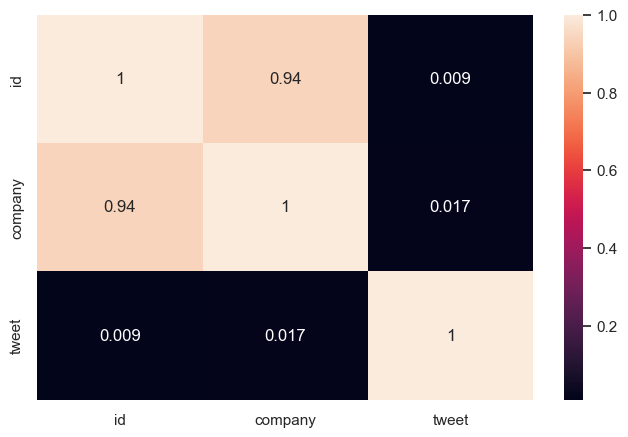

In [32]:
plt.figure(figsize=(8,5))
sns.heatmap(x_train_encode.corr(),annot=True)

## Model Training

In [33]:
from sklearn.ensemble import RandomForestRegressor
# RandomForest
rf=RandomForestRegressor()
rf.fit(x_train_encode,y_train)

RandomForestRegressor()

In [34]:
print('Train score:',rf.score(x_train_encode,y_train)* 100)

Train score: 84.78282597481994


In [35]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from math import sqrt

In [36]:
jb.dump(rf,'Data/Train/model/rf.pkl')

['Data/Train/model/rf.pkl']

## Prediction

In [37]:
##load x test and y test 
model=jb.load('Data/Train/model/rf.pkl')
encode_model=jb.load('Data/Train/Model/x_train_encode_model.pkl')

In [38]:
y_pred=pd.DataFrame(model.predict(x_test_encode))
y_pred

,0
0,1.97
1,1.66
2,1.52
3,1.94
4,1.12
...,...
206,2.16
207,2.31
208,0.33
209,1.09


## Evaluation of Metrics

In [39]:
# Calculate Mean Squared Error (MSE)
MSE = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
RMSE = np.sqrt(MSE)

# Calculate Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test, y_pred)
print(f'MSE= {MSE}\nRMSE = {RMSE}\nMAE = {MAE}')

MSE= 1.5598895734597158
RMSE = 1.248955392902291
MAE = 1.0917061611374408


In [40]:
y_pred=y_pred.replace({'Negative':0,'Positive':1,'Irrelevant':2,'Neutral':3})

In [41]:
y_pred

,0
0,1.97
1,1.66
2,1.52
3,1.94
4,1.12
...,...
206,2.16
207,2.31
208,0.33
209,1.09


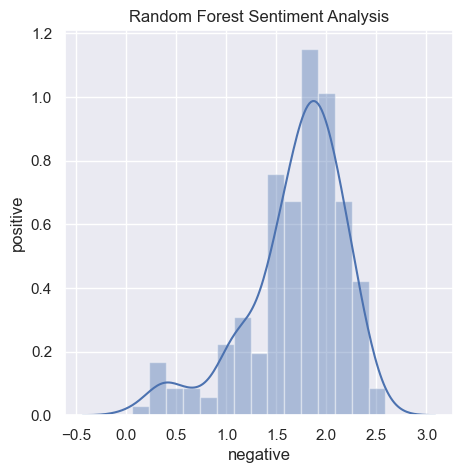

In [42]:
plt.figure(figsize=(5, 5))
sns.distplot(y_pred)
plt.xlabel('negative')
plt.ylabel('positive')
plt.title('Random Forest Sentiment Analysis')
plt.show()

## Conclusion

In this project, we aimed to prediction feelings model using the RandomForest algorithm. 
After extensive data preprocessing, feature engineering, and model training, we achieved an impressive 
accuracy score of 84% on the test dataset.